In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
random.seed(1447)

In [2]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

In [3]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

## Parameters
### Shipments Data

In [25]:
df_rep = pd.read_csv('In/stacked_bar.csv', sep=',', index_col = 0)
print('{:,} lines'.format(len(df_rep)))
df_rep.head()

10,000 lines


,Test,Order Time,Order Date,City,Store,#Shipment,Order Amount,Transmission OnTime,Transmission,Start PickPack,...,Store Arrival,Store Arrival Date,Delivery OnTime,Delivery Time,Extraction Time,Last Status,Reason Code,Late,Is Late,LT
0,1,2021-05-02 17:00:00.000000,2021-05-02,CITY1,CITY1/ST5,2021-05-02/CITY1/ST5/1,2759,False,2021-05-03 17:00:00.000000,2021-05-04 07:00:00.000000,...,2021-05-06 16:36:04.552300,2021-05-06,False,2021-05-07 16:30:00.000000,2021-05-11 10:00:00,Delivery Time,Multi,Late,True,4.979167
1,2,2021-05-09 12:00:00.000000,2021-05-09,CITY2,CITY2/ST9,2021-05-09/CITY2/ST9/2,1503,True,2021-05-09 13:19:07.490100,2021-05-10 07:00:00.000000,...,2021-05-12 16:19:07.938647,2021-05-12,True,2021-05-12 16:19:07.938647,2021-05-11 10:00:00,Takeoff,NaN,OnTime,False,3.179953
2,3,2021-05-02 14:00:00.000000,2021-05-02,CITY2,CITY2/ST1,2021-05-02/CITY2/ST1/3,5140,True,2021-05-02 15:32:13.222838,2021-05-03 07:00:00.000000,...,2021-05-05 14:46:07.574411,2021-05-05,True,2021-05-05 14:46:07.574411,2021-05-11 10:00:00,Delivery Time,NaN,OnTime,False,3.032032
3,4,2021-05-11 11:00:00.000000,2021-05-11,CITY4,CITY4/ST3,2021-05-11/CITY4/ST3/4,1677,True,2021-05-11 12:01:04.166619,2021-05-12 07:00:00.000000,...,2021-05-14 15:46:42.418481,2021-05-14,True,2021-05-14 15:46:42.418481,2021-05-11 10:00:00,Open,NaN,OnTime,False,3.199102
4,5,2021-05-08 10:00:00.000000,2021-05-08,CITY4,CITY4/ST1,2021-05-08/CITY4/ST1/5,4158,True,2021-05-08 10:56:14.062500,2021-05-09 07:00:00.000000,...,2021-05-11 16:00:59.003211,2021-05-11,True,2021-05-11 16:00:59.003211,2021-05-11 10:00:00,Start Clearance,NaN,OnTime,False,3.250683


In [14]:
# PARAMS
EXTRACTION_DAY = '2021-05-11'
EXTRACTION_DATE = '{} 10:00:00'.format(EXTRACTION_DAY)
EXTRACTION_DAY = pd.to_datetime(EXTRACTION_DAY).date()

In [22]:
# Group by date
df_stat = pd.DataFrame(df_rep.groupby(['Order Date', 'Last Status'])['#Shipment'].nunique())
df_stat.columns = ['#Shipments']
df_stat = pd.pivot_table(df_stat.reset_index(), index = 'Order Date', columns = 'Last Status', 
                         values = '#Shipments', aggfunc = np.sum).fillna(0)

df_plot = df_stat.reset_index()
df_plot['Order Date'] = pd.to_datetime(df_plot['Order Date']).dt.date
df_plot = df_plot[df_plot['Order Date']<=EXTRACTION_DAY]
df_plot.head()

Last Status,Order Date,Delivery Time,End Clearance,Leaving Airport,Open,Order Time,Pickpack,Start Clearance,Start PickPack,Takeoff
0,2021-05-01,531.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-05-02,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-05-03,508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-05-04,523.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-05-05,516.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


### Plot Number of Shipments per status

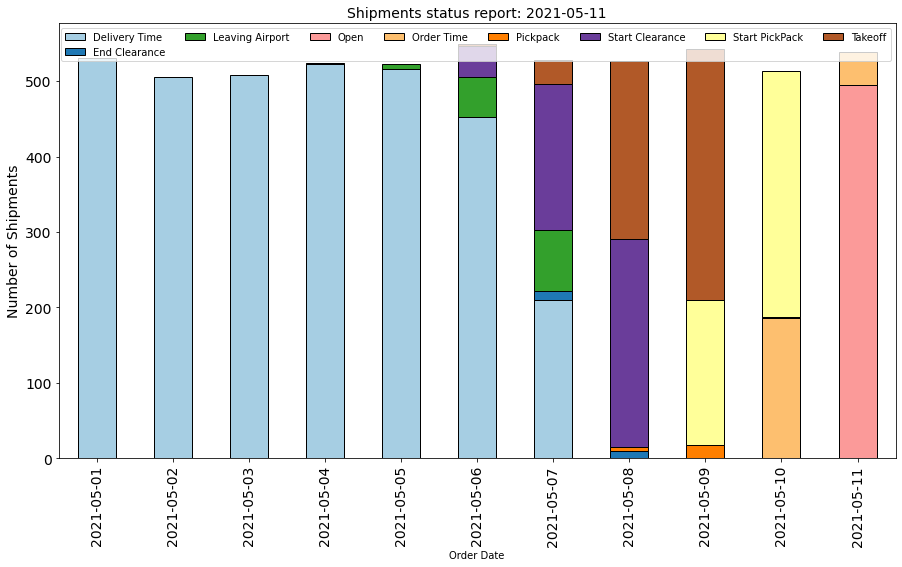

In [29]:
ax = df_plot.reset_index().plot.bar(figsize=(15, 8), edgecolor='black', x = 'Order Date',
                      y=df_stat.columns
                      , legend= True, fontsize = 14, stacked = True, colormap='Paired')
plt.ylabel('Number of Shipments', fontsize = 14)
plt.title('Shipments status report: {}'.format(EXTRACTION_DAY), fontsize = 14)
ax.legend(ncol=8)
plt.show()